<font style='font-size:1.5em'>**🧑‍🏫 Week 05 Lecture – NB01 - Data Visualisation with the Grammar-of-Graphics** </font>

<font style='font-size:1.2em'>LSE [DS105A](https://lse-dsi.github.io/DS105/autumn-term/index.html){style="color:#e26a4f;font-weight:bold"} – Data for Data Science (2024/25) </font>



<div style="color: #333333; background-color:rgba(226, 106, 79, 0.075); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); padding: 20px 0 20px 10px; margin: 10px 0 10px 0; flex: 1 1 calc(45% - 20px);min-width: 250px;max-width: 350px;align-items:top;min-height: calc(45% - 20px); box-sizing: border-box;font-size:0.9em;">

🗓️ **DATE:** 31 October 2024 

⌚ **TIME:** 16.00-18.00

📍 **LOCATION:** CLM.5.02
</div>🎃


**AUTHORS:**  Dr. [Jon Cardoso-Silva](https://jonjoncardoso.github.io){style="color:#e26a4f;font-weight:bold"}

**DEPARTMENT:** [LSE Data Science Institute](https://lse.ac.uk/dsi){style="color:#e26a4f;font-weight:bold"}

**OBJECTIVE**: The building blocks of the grammar-of-graphics approach to data visualisation.

**REFERENCES:**

- 🌐 [`lets-plot` Get Started page](https://lets-plot.org/python/index.html){style="color:#e26a4f;font-weight:bold"}
- 📖 [Official `lets-plot` documentation](https://lets-plot.org/python/pages/api.html){style="color:#e26a4f;font-weight:bold"}
- 📊 [Gallery of plots](https://lets-plot.org/python/pages/gallery.html){style="color:#e26a4f;font-weight:bold"} (learn from complex plots)

---



**⚙️ The setup**

We will use the following libraries today:

In [20]:
import datetime

import pandas as pd

from lets_plot import *
LetsPlot.setup_html()


from IPython.display import Image

Read an existing dataset:

In [21]:
df_reddit = pd.read_csv('../data/reddit/top_posts_nov_2023.csv')

In [22]:
df_reddit.head()

,id,title,post_hint,created_utc,ups,downs,upvote_ratio,score,subreddit_id,subreddit_name_prefixed,...,num_comments,is_original_content,is_self,is_video,author,author_fullname,author_premium,content_categories,edited,domain
0,17px794,On this day 3 years ago Rudy Giuliani held a p...,image,1.699372e+09,70187,0,0.91,70187,t5_2qh0u,r/pics,...,2580,False,False,False,ohnoh18,t2_3qo6zvfi,True,['photography'],False,i.redd.it
1,17pv6yo,TIL Aretha Franklin required that she be paid ...,link,1.699366e+09,31025,0,0.95,31025,t5_2qqjc,r/todayilearned,...,746,False,False,False,trifletruffles,t2_4qxo2xud,False,NaN,False,insider.com
2,17q3pck,The mic was in picture!,hosted:video,1.699389e+09,29177,0,0.94,29177,t5_2qh33,r/funny,...,497,False,False,True,asap3210,t2_12cbv7,False,NaN,False,v.redd.it
3,17ptujg,TIL ex-Yahoo CEO Marissa Mayer admitted that i...,link,1.699362e+09,24713,0,0.93,24713,t5_2qqjc,r/todayilearned,...,1807,False,False,False,tyrion2024,t2_ojnpnf61,False,NaN,False,businessinsider.com
4,17ptg5p,8 Weeks vs 8 Years,image,1.699361e+09,21625,0,0.96,21625,t5_2qh1o,r/aww,...,185,True,False,False,Mab_12,t2_4wutdy4j,False,NaN,False,i.redd.it


The `created_utc` column is large integer that represents date in [UNIX time format](https://www.wikiwand.com/en/articles/Unix_time), let's convert it to a datetime dtype:

In [23]:
df_reddit['created_utc'] = df_reddit['created_utc'].apply(lambda x: datetime.datetime.fromtimestamp(x))

#  Plots are made of layers!

We will use the creation of a barplot to illustrate how the grammar of graphics works. You can read more about it in the references below:
- ["The Layered Grammar of Graphics"](http://vita.had.co.nz/papers/layered-grammar.pdf)
- [R for Data Science, Chapter 3: Data Visualisation](https://r4ds.had.co.nz/data-visualisation.html#creating-a-ggplot)



## How to create a barplot with `lets-plot`?

Let's use these principles to build all the layers of a barplot. We will use the `lets-plot` package, a Python implementation of the `ggplot2` package in R.

Say we want to convert the summarised data below into a barplot:

In [24]:
plot_df = df_reddit['subreddit_name_prefixed'].value_counts().reset_index()
plot_df

,subreddit_name_prefixed,count
0,r/news,20
1,r/worldnews,18
2,r/todayilearned,16
3,r/funny,14
4,r/aww,14
5,r/gaming,13
6,r/OldSchoolCool,12
7,r/mildlyinteresting,12
8,r/AskReddit,11
9,r/pics,10


## End result:

(as shown live in lecture)

In [25]:
g = (
    ggplot(data=plot_df, mapping=aes(y='subreddit_name_prefixed', x='count')) + 
    geom_bar(stat='identity', fill='red') +
    scale_y_discrete_reversed() +
    labs(x="Number of viral posts",
         y="Subreddit",
         title="r/news is the subreddit with the most viral posts",
         subtitle="Reddit top 100 data was collected in July 2023 (old)")
)

ggsave(plot=g, filename='reddit_top_posts_v1.png', path="../figures/reddit/")

'c:\\Users\\Jon\\Workspace\\ds105a-2024\\figures\\reddit\\reddit_top_posts_v1.png'

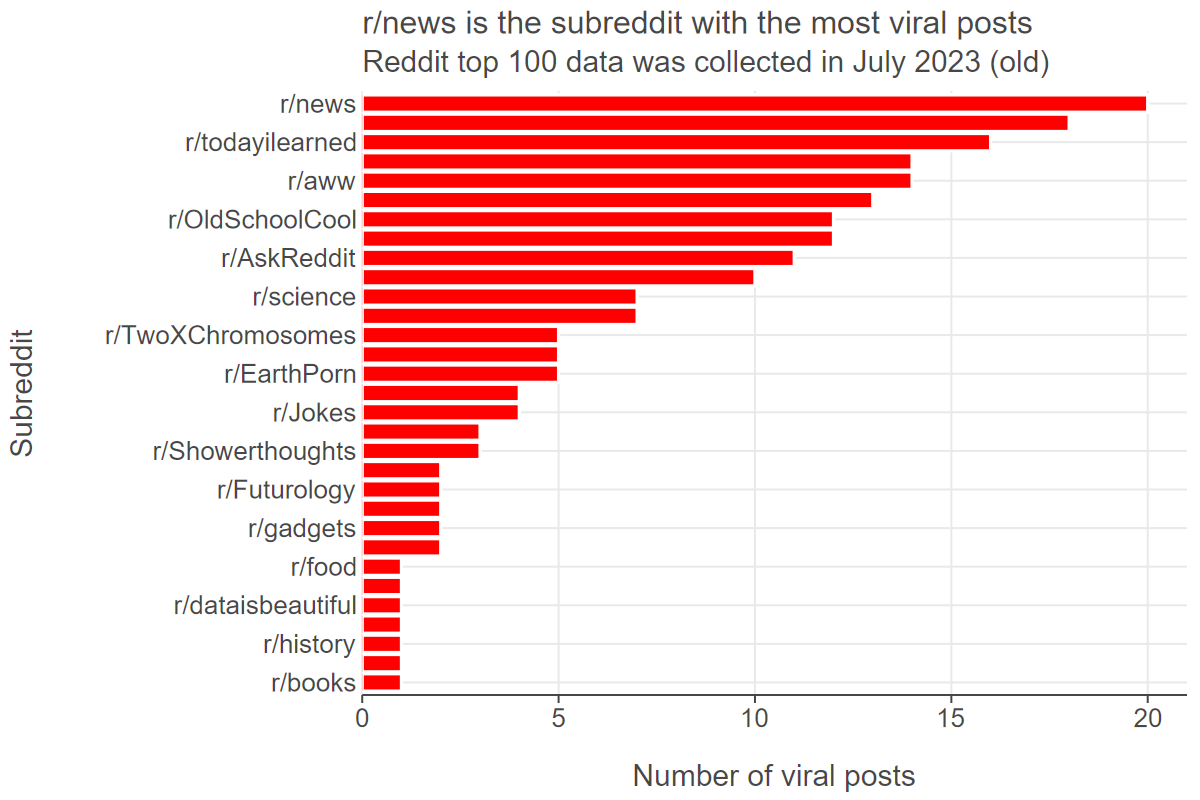

In [26]:
Image("../figures/reddit/reddit_top_posts_v1.png")

## Step-by-step logic of building the plot:

In [27]:
df_reddit['subreddit_name_prefixed'].value_counts().head()

subreddit_name_prefixed
r/news             20
r/worldnews        18
r/todayilearned    16
r/funny            14
r/aww              14
Name: count, dtype: int64

First of all, we need to convert the result above to a DataFrame (we can't work with a Series):


In [28]:
# Let's stablish the practice of creating a new dataframe for each plot
# This way, we avoid modifying the original dataframe by accident
plot_df = df_reddit['subreddit_name_prefixed'].value_counts().to_frame().reset_index()
plot_df.head()

,subreddit_name_prefixed,count
0,r/news,20
1,r/worldnews,18
2,r/todayilearned,16
3,r/funny,14
4,r/aww,14


Ops. I have to fix the column names:


In [29]:
plot_df.columns = ['subreddit', 'count']

Now think about the **mapping** of the coordinates of the plot:

**What goes in the X axis?** The `subreddit_name_prefixed` column.

**What goes in the Y axis?** The `count` column.

We specify this mapping by using the `aes()` function (which stands for "aesthetics"):

In [31]:
#This is how you specify the axis
g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    geom_bar()
)

ggsave(plot=g, filename='reddit_top_posts_v2.png', path="../figures/reddit/")

g

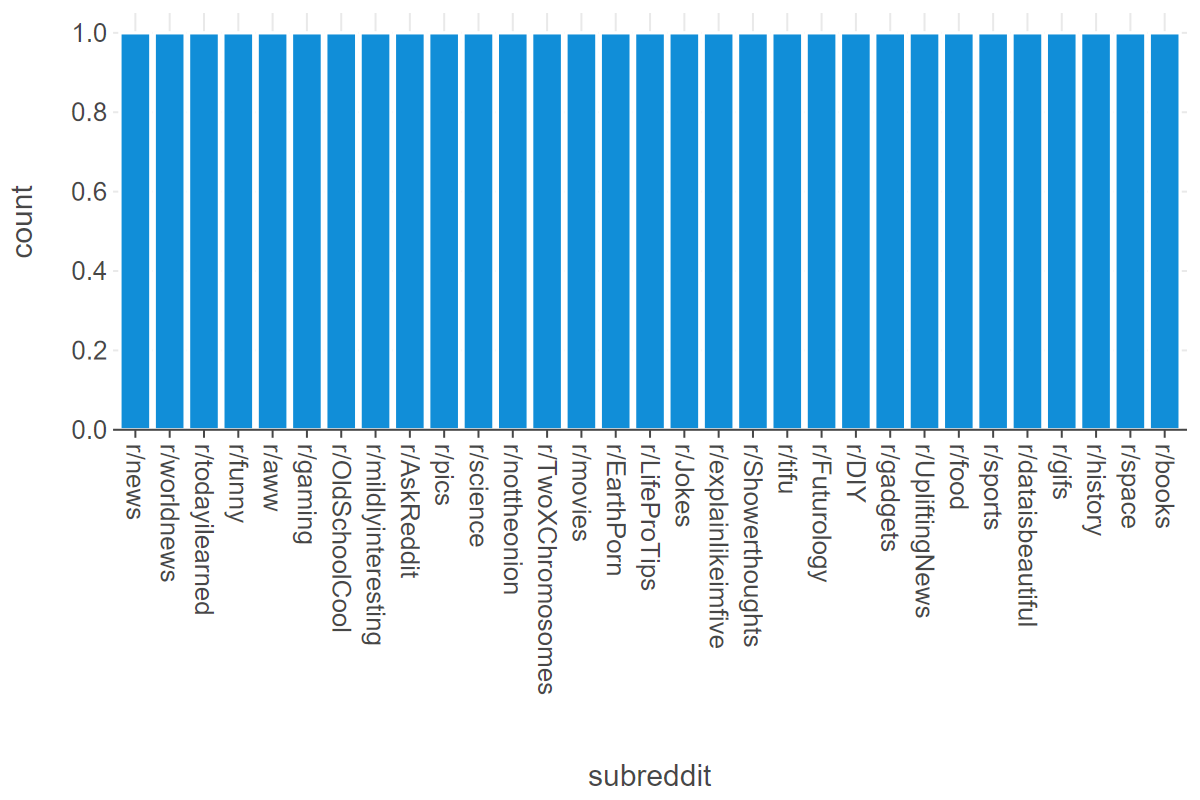

In [32]:
Image("../figures/reddit/reddit_top_posts_v2.png")

The Y-axis is a bit weird. Everything is 1?!?

We need to indicate to the plot that we want to **sum** the values of the `count` column, not whether they exist or not. We do this by using the `stat` argument in the `geom_bar()` function:

In [34]:
#This is how you specify the axis
g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    geom_bar(stat='identity')
)

ggsave(plot=g, filename='reddit_top_posts_v3.png', path="../figures/reddit/")

g

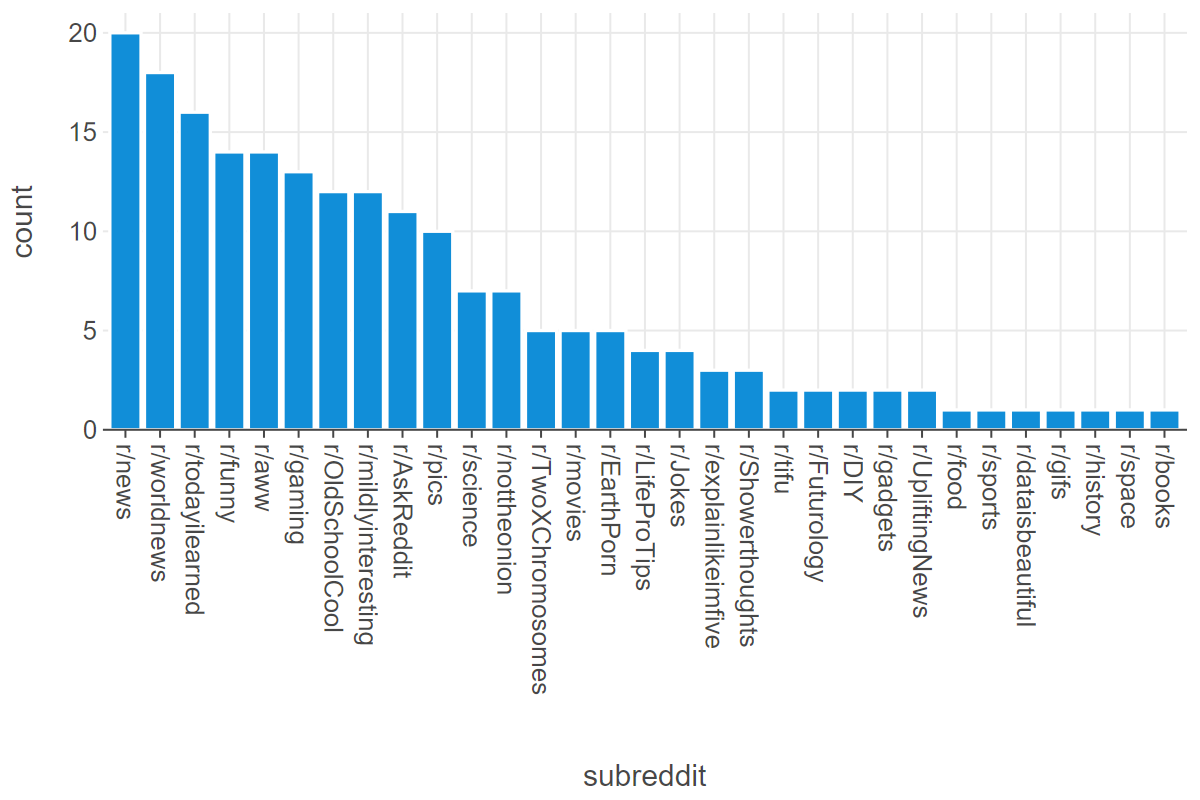

In [35]:
Image("../figures/reddit/reddit_top_posts_v3.png")

### You can customise axes!

Axes, just like colours, are **scales** of the plot. We can customise them with the `scale_*_*` functions, where the first `*` is the type of scale (e.g. in case of axes,`scale_x` or `scale_y`) and the second `*` is the type of scale (e.g. `scale_x_continuous`, if the scale is a continous numerical scale).

In [36]:
#Let's change the title of the count axis

g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    scale_y_continuous(name="Number of posts") +  # Change the Y-axis before flipping it
    geom_bar(stat='identity')
)

ggsave(plot=g, filename='reddit_top_posts_v4.png', path="../figures/reddit/")

g

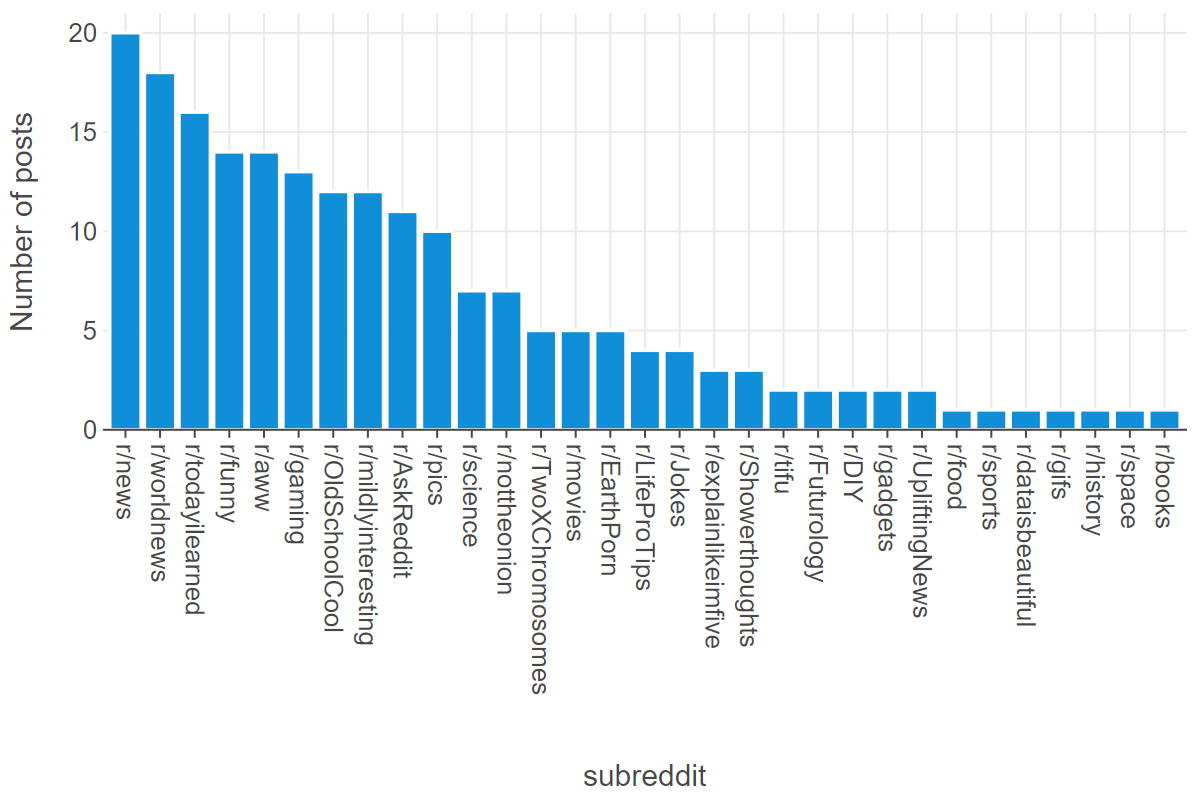

In [38]:
Image("../figures/reddit/reddit_top_posts_v4.png")

In [39]:
# We could choose to change the labels of that axis

g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    scale_y_continuous(name="Number of posts", breaks=list(range(0, 20+2, 2))) +  
    geom_bar(stat='identity')
)

ggsave(plot=g, filename='reddit_top_posts_v5.png', path="../figures/reddit/")

g

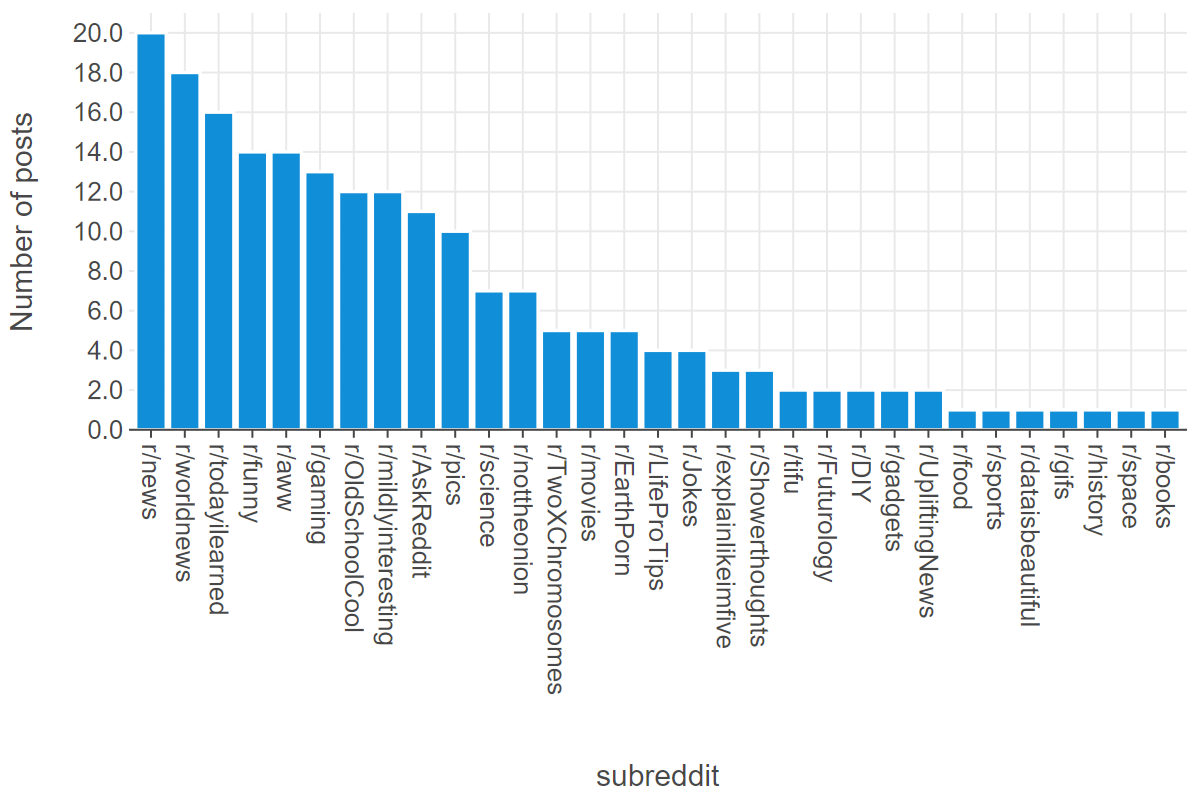

In [40]:
Image("../figures/reddit/reddit_top_posts_v5.png")

🗣️ **CLASSROOM DISCUSSION:** Why do you think we had to do `range(0, 20+2, 2)`? Why not just `range(0, 20)`?

I could flip it:

In [41]:
g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    scale_y_continuous(name="Number of posts", breaks=list(range(0, 20+2, 2))) +  
    coord_flip() +
    geom_bar(stat='identity')
)

ggsave(plot=g, filename='reddit_top_posts_v6.png', path="../figures/reddit/")

# This is a little bit more useful but hard to read because there is no order
g

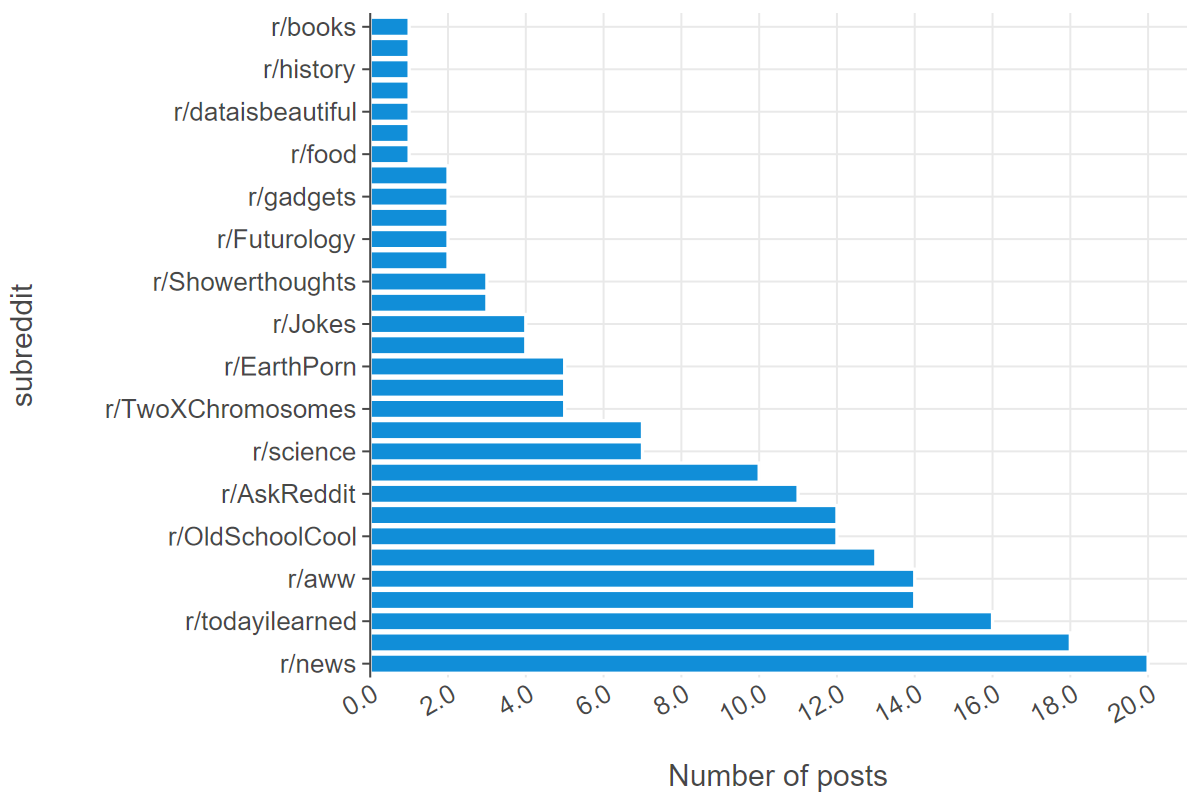

In [42]:
Image("../figures/reddit/reddit_top_posts_v6.png")

### Add in more aesthetics

Each `geom` 'listens' to a specific set of aesthetics. 

If you go to the [documentation of the `geom_bar()` function](https://lets-plot.org/python/pages/api/lets_plot.geom_bar.html#lets_plot.geom_bar), you will see that the `x` and `y` aesthetics are mandatory, but there are others which are optional.


In [43]:
order_subreddits = list(reversed(plot_df['subreddit'].tolist()))

g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count")) +
    scale_x_discrete(name="Subreddit Names", limits=order_subreddits) +
    scale_y_continuous(name="Number of posts", breaks=list(range(0, 20+2, 2))) +  
    coord_flip() +
    geom_bar(stat='identity', fill='red') + # THIS IS THE IMPORTANT BIT
    theme_minimal() +
    labs(title="I could fix the colour used to fill the bars!")
)


ggsave(plot=g, filename='reddit_top_posts_v7.png', path="../figures/reddit/")


g

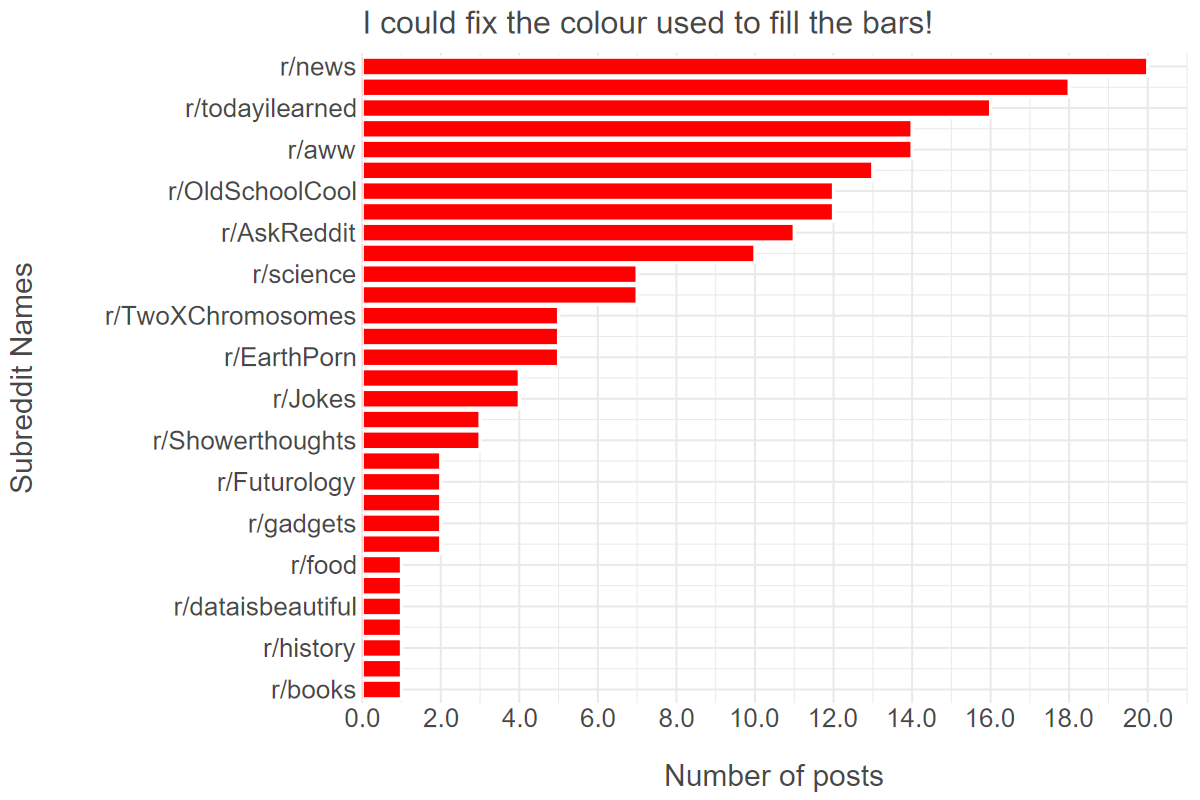

In [44]:
Image("../figures/reddit/reddit_top_posts_v7.png")

### Who said you MUST stick to a single `geom`?

Let's add a `geom_text()` to show the actual values of the bars:

In [51]:
order_subreddits = list(reversed(plot_df['subreddit'].tolist()))

g = (
    ggplot(plot_df, mapping=aes(x="subreddit", y="count", fill="count", label="count")) + # I added a label aesthetic here
    scale_x_discrete(name="Subreddit Names", limits=order_subreddits) +
    scale_y_continuous(name="Number of posts", breaks=list(range(0, 20+2, 2))) +  
    coord_flip() +
    geom_bar(stat='identity') + 
    geom_text(mapping=aes(y="count"), nudge_y=1, size=6) + # THIS IS THE IMPORTANT BIT. Notice how I redefined the y-axis just for the text
    theme_minimal() +
    ggsize(800, 800) +
    labs(title="OR, I could map the fill to a column (count)!",
         subtitle="Because count is a numerical variable, plotnine automatically converts it to a gradient scale",)
)

ggsave(plot=g, filename='reddit_top_posts_v8.png', path="../figures/reddit/")

g

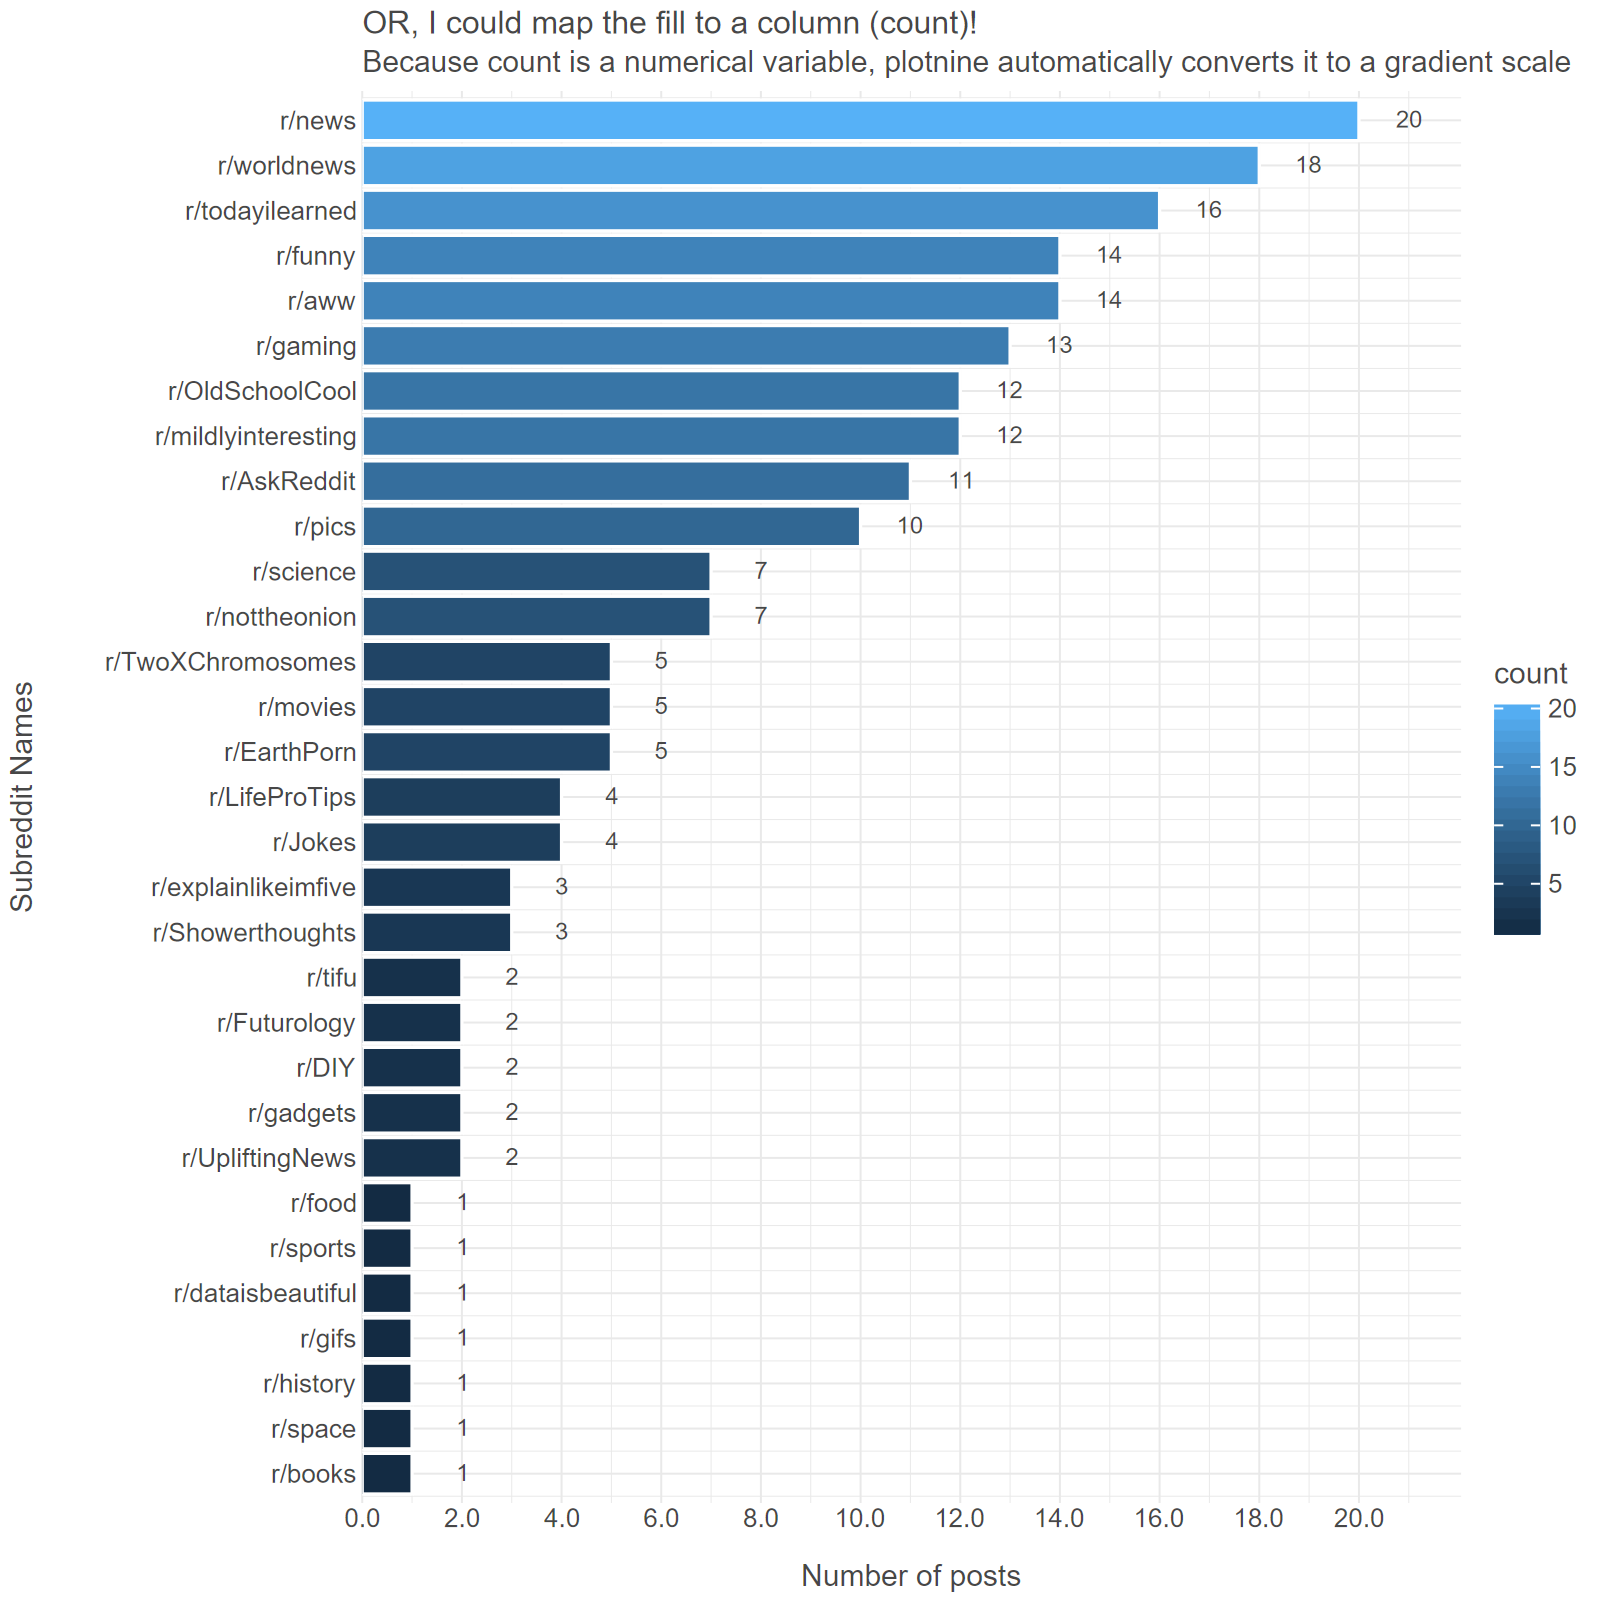

In [52]:
Image("../figures/reddit/reddit_top_posts_v8.png")

Now what? Check the [official documentation](https://lets-plot.org/python/pages/api.html) to learn about the different geoms you can use and the many different ways you can customise the layers and scales (axes, colours, etc.) of plots according to the grammar-of-graphics philosophy.